In [2]:
#Decision Tree


In [3]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [4]:
data=sns.load_dataset("iris")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


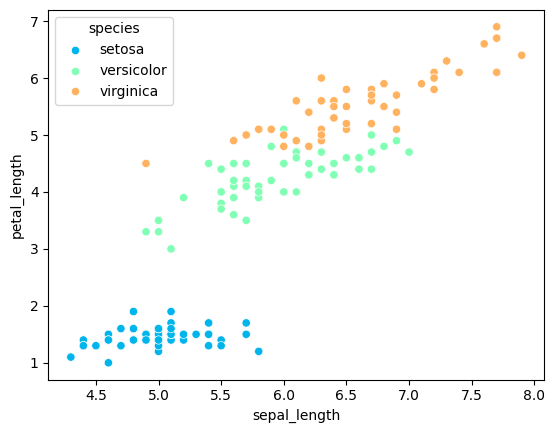

In [5]:
#visualization
sns.scatterplot(x=data["sepal_length"],y=data["petal_length"],hue=data["species"],palette="rainbow")
plt.show()

In [6]:
#Dividing sample data set iris into features(x) and target(y)
x = data.drop("species",axis=1)# features
y = data["species"]

In [7]:
#train_ test splitting 80:20
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [9]:
print("X_train Size",x_train.shape)
print("X_test Size",x_test.shape)
print("y_train Size",y_train.shape)
print("y_test Size",y_test.shape)

X_train Size (120, 4)
X_test Size (30, 4)
y_train Size (120,)
y_test Size (30,)


In [10]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
# Make predictions
y_pred= dt.predict(x_test)
# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [12]:
dtm=DecisionTreeClassifier(criterion="entropy",max_depth=3)
dtm.fit(x_train,y_train)
y_upd_pred=dtm.predict(x_test)
print("Accuracy with entropy:", accuracy_score(y_test, y_upd_pred))

Accuracy with entropy: 1.0


**PRUNING**

In [14]:
parameters={
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5],
    'max_features':['log2','sqrt']
}

**HYPER PARAMETER** **TUNING**

In [ ]:
#gridsearchcv &randomsearchcv algorithms

In [18]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
model=DecisionTreeClassifier()
cv=GridSearchCV(model,parameters,scoring=['accuracy'],refit='accuracy')#refit='accuracy'
cv.fit(x_train,y_train)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['log2', 'sqrt']},
             refit='accuracy', scoring=['accuracy'])

In [20]:
best_model=cv.best_estimator_

In [22]:
predc_cv=cv.predict(x_test)
predc_cv

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [23]:
accuracy_score(y_test,predc_cv)

1.0